<a href="https://colab.research.google.com/github/OmkarArote/ML-Assignment/blob/main/KNN_AQI_India_2015_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

Importing the dataset

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/city_day.csv')

Know your dataset

In [ ]:
print('First five data of the data frame: \n',df.head(5))
print('===========================================================================')
print('\nDescription of the data frame: \n',df.describe())
print('===========================================================================')
print('\nInformation of the data frame:')
print(df.info())
print('===========================================================================')

First five data of the data frame: 
         City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  

Description of the data frame: 
               PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  2594

Dataset Preprocessing

In [ ]:
# Impute missing values with mean value of the respective columns
imputer = SimpleImputer(strategy='mean')
df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']] = imputer.fit_transform(df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']])

# Or we can just drop the rows with atleast one null value init
# df = df.dropna(axis=0)

# Convert 'Date' column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Date' column and store it in a new 'Year' column
df['Year'] = df['Date'].dt.year

# Print the first 5 rows to check if the 'Year' column was added successfully
df.head()

<ipython-input-50-3d5333822ecc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-50-3d5333822ecc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,2017
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,2017
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,2017
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,2017
2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate,2017


In [ ]:
# Get a list of the cities that appear in both years
cities = set(df[df['Year'] == 2015]['City']) & set(df[df['Year'] == 2016]['City'])
cities

{'Delhi', 'Hyderabad'}

In [ ]:
# Filter the dataset to include only the common cities and drop any rows with na values in the AQI_Bucket column
df = df[df['City'].isin(cities) & df['AQI_Bucket'].notna()]

Performing EDA

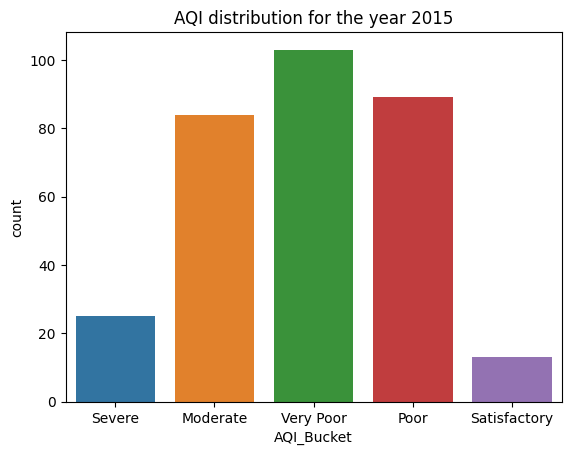

In [ ]:
# Visualize the data for the year 2015
sns.countplot(x='AQI_Bucket', data=df[df['Year'] == 2015])
plt.title('AQI distribution for the year 2015')
plt.show()

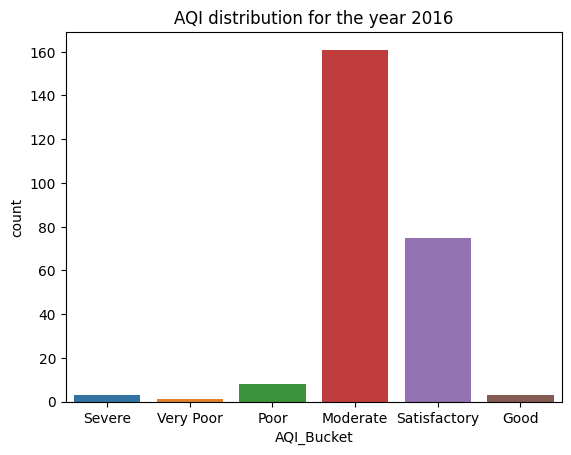

In [ ]:
# Visualize the data for the year 2016
sns.countplot(x='AQI_Bucket', data=df[df['Year'] == 2016])
plt.title('AQI distribution for the year 2016')
plt.show()

Performing KNN

Confusion Matrix:
[[ 27   1   0   0   0   0]
 [  4 137  10   0   0   0]
 [  0  26 194  12   0   0]
 [  0   0  13  54   6   0]
 [  0   0   4   6  49   3]
 [  0   0   0   2   8  13]] 

Performance Metric:
              precision    recall  f1-score   support

        Good       0.87      0.96      0.92        28
Satisfactory       0.88      0.84      0.86       232
    Moderate       0.73      0.74      0.73        73
        Poor       0.84      0.91      0.87       151
   Very Poor       0.81      0.57      0.67        23
      Severe       0.78      0.79      0.78        62

    accuracy                           0.83       569
   macro avg       0.82      0.80      0.80       569
weighted avg       0.83      0.83      0.83       569
 



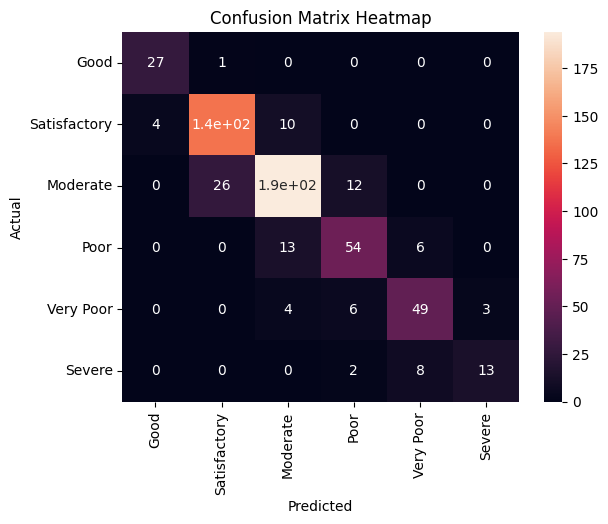

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']], df['AQI_Bucket'], test_size=0.2, random_state=42)

# Fit a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'])
print('Confusion Matrix:')
print(cm, '\n')

print('Performance Metric:')
print(classification_report(y_test, y_pred, target_names=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']), '\n')

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, xticklabels=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'], yticklabels=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()